# Exploring Credit Loan Data

## 1. Introduction

In credit business, company has to make decision about loans approval based on the applicant's profile. Company shall able to identify if the loan applicants is likely to repay the loan or not. The consequences are:

- If the applicants is able to repay the loan, missing this kind of applicants may result in business loss
- If the applicants is not able to repay the loan, accepting the loan from this applicants is also result in business loss.

Lending Club is peer-to-peer lending company, which people in needs can apply for loan, and some can become the investor by providing loan funding and later enjoy the interest as the profit.

While data growth is significant in this era, we can utilize it to become more useful. In this occasion, writer is trying to utilize *Lending Club Data* to predict creditworthiness of future loan applicants by developing a Machine Learning Model to predict if specific loan (defined by the loan structure and applicants background) will defaulted or not.

## 2. Exploring the Dataset

In [1]:
import pandas as pd
import numpy as np
from modules.data_exploration import DataExploration
from modules.data_preprocess import LoanDataPreprocess
from joblib import dump, load

pd.set_option('display.float', '{:.2f}'.format)
pd.set_option('display.max_columns', 75)
pd.set_option('display.max_rows', 75)

data_preprocess = LoanDataPreprocess().fit()
loan_df = pd.read_csv('dataset\lc_2010-2015.csv', dtype={'desc': 'str', 'verification_status_joint': 'str'})
loan_df = data_preprocess.transform(loan_df)
loan_df.head()
    

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501.00,1296599.00,5000.00,5000.00,4975.00,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.00,Verified,2011-12-01,Fully Paid,n,Borrower added on 12/22/11 > I need to upgrade...,credit_card,Computer,860xx,AZ,27.65,0.00,1985-01-01,1.00,NaN,NaN,3.00,0.00,13648.00,83.70,9.00,f,0.00,0.00,5861.07,5831.78,5000.00,861.07,0.00,0.00,0.00,2015-01-01,171.62,NaT,2016-01-01,0.00,NaN,1.00,INDIVIDUAL,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430.00,1314167.00,2500.00,2500.00,2500.00,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.00,Source Verified,2011-12-01,Charged Off,n,Borrower added on 12/22/11 > I plan to use thi...,car,bike,309xx,GA,1.00,0.00,1999-04-01,5.00,NaN,NaN,3.00,0.00,1687.00,9.40,4.00,f,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,NaT,2013-09-01,0.00,NaN,1.00,INDIVIDUAL,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175.00,1313524.00,2400.00,2400.00,2400.00,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.00,Not Verified,2011-12-01,Fully Paid,n,NaN,small_business,real estate business,606xx,IL,8.72,0.00,2001-11-01,2.00,NaN,NaN,2.00,0.00,2956.00,98.50,10.00,f,0.00,0.00,3003.65,3003.65,2400.00,603.65,0.00,0.00,0.00,2014-06-01,649.91,NaT,2016-01-01,0.00,NaN,1.00,INDIVIDUAL,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863.00,1277178.00,10000.00,10000.00,10000.00,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.00,Source Verified,2011-12-01,Fully Paid,n,Borrower added on 12/21/11 > to pay for proper...,other,personel,917xx,CA,20.00,0.00,1996-02-01,1.00,35.00,NaN,10.00,0.00,5598.00,21.00,37.00,f,0.00,0.00,12226.30,12226.30,10000.00,2209.33,16.97,0.00,0.00,2015-01-01,357.48,NaT,2015-01-01,0.00,NaN,1.00,INDIVIDUAL,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358.00,1311748.00,3000.00,3000.00,3000.00,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.00,Source Verified,2011-12-01,Current,n,Borrower added on 12/21/11 > I plan on combini...,other,Personal,972xx,OR,17.94,0.00,1996-01-01,0.00,38.00,NaN,15.00,0.00,27783.00,53.90,38.00,f,766.90,766.90,3242.17,3242.17,2233.10,1009.07,0.00,0.00,0.00,2016-01-01,67.79,2016-02-01,2016-01-01,0.00,NaN,1.00,INDIVIDUAL,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 2.1. Data fields containing 'Zero' or 'Missing' records

I will give a more detailed review for data fields that has *non-null* less than total records of 466,285. They must have *zeroes* or *missing records (NaN)* and needed to be identified, since each value may have different meaning (for example, *0* in datafield *open_acc* means no current credit account opened while *missing/NaN* records clearly explain that no information recorded).
After this review, we can consider how to deal with this condition for preparation of machine learning features.

In [2]:
applicant_features = [
    'member_id', 'emp_title', 'emp_length', 'home_ownership',
    'annual_inc', 'verification_status', 'dti', 'delinq_2yrs',
    'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
    'mths_since_last_record', 'open_acc', 'revol_bal', 'revol_util',
    'total_acc', 'collections_12_mths_ex_med', 'mths_since_last_major_derog',
    'policy_code', 'annual_inc_joint', 'dti_joint', 'verification_status_joint',
    'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 
    'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
    'il_util', 'open_rv_12m', 'open_rv_24m', 'all_util', 'total_rev_hi_lim', 
    'inq_fi', 'total_cu_tl', 'inq_last_12m', 'pub_rec', 'max_bal_bc'
    ]
loan_features = [
    'id', 'loan_amnt', 'term', 'int_rate', 'installment', 'grade',
    'sub_grade', 'pymnt_plan', 'desc', 'purpose', 'title',
    'zip_code', 'addr_state', 'policy_code', 'application_type'
    ]
post_origin_features = [
    'funded_amnt', 'funded_amnt_inv', 'issue_d', 'loan_status', 
    'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_rec_prncp',
    'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
    'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
    'total_pymnt', 'total_pymnt_inv'
    ]

#### **Missing Records**

It is best to categorize the missing data based on the type of missing. Most commonly known types of missing data are as follows:

- **Structurally missing data**, is the data that is missing for a logical reason, since the reason caused them to not exist. For example from our data, missing data of `annual_inc_joint` is a structural missing if the loan's `application_type` is `INDIVIDUAL` loan rather than `JOINT` loan.
- **Missing Completely at Random (MCAR)**, is the data that is missing with no reasonable connection or pattern to another data. For example, `ann_inc` is very specific record of each observation, hence missing this record is categorized as MCAR. Since we can do nothing to overcome this missing value, the most possible action is to drop the observations if the features is crucial to avoid any possible biases.
- **Missing at Random (MAR)**, is the data that is missing but the connection or pattern can be predicted (e.g. using extrapolation) or extracted from combination of other features (e.g. substraction, summation, etc.). For example, if an observation has a missing `int_rate` record, we can possibly calculate it by using `loan_amnt` and `total_pymnt`.
- **Missing not at Random (MNAR)**, is the data where the reason or mechanism for why the data is missing is known. For example, missing loan `desc` is known because the loan applicant was not inputting it to the system.

##### *Applicant Profile* and *Loan Profile* Features

*Applicant Profile* and *Loan Profile* is our main features for developing the machine learning model. Action to overcome the missing features will be explained accordingly.

Let's start by *Applicant Profile*.

In [3]:
data_exploration = DataExploration(loan_df)
data_exploration.show_nans_or_zeroes('nans', applicant_features).sort_values('Nans Count', ascending=False)

,Nans Count,Nans Percentage (%),Data Types
dti_joint,886870,99.94,float64
annual_inc_joint,886868,99.94,float64
verification_status_joint,886868,99.94,category
il_util,868762,97.90,float64
mths_since_rcnt_il,866569,97.65,float64
inq_last_12m,866007,97.59,float64
total_cu_tl,866007,97.59,float64
inq_fi,866007,97.59,float64
all_util,866007,97.59,float64
open_rv_24m,866007,97.59,float64


1. Structurally Missing: `total_rev_hi_lim`, `tot_coll_amnt`, `tot_curr_bal`, `revol_util`, `collections_12_mths_ex_med`, `inq_last_6mths`, `delinq_2yrs`, `earliest_cr_line`, `total_acc`, `open_acc`, `acc_now_delinq`, and most of the features that has a high percentage of missing data ($>$ 50%). Note on missing percentage of `_joint` features, we can easily confirm that most of the loan is `INDIVIDUAL` loan. We will drop the observations with `JOINT` type loan due to limited data compared to `INDIVIDUAL` loan hence limiting the scope of the model to covers only `INDIVIDUAL` loan. For features related to `mnths_since_`, `NaN` will be replaced as `99` (happens 'long ago'), otherwise `1` (happens recently).

2. MNAR: `emp_title`. High cardinal data won't be used for machine learning features.

3. MCAR: `annual_inc`, `emp_length`, `earliest_cr_line`. Observations with misisng `annual_inc` will be dropped. For `emp_length`, we will one-hot encode this and also provide *out-of-vocabulary* dummy variables for this missing data. `earlist_cr_line` will be utilized for feature extraction.

>More on *Structurally Missing* data that possibly includes *MCAR*, *MAR*, or *MNAR*:
>1. `mths_since_last_record` is linked with `pub_rec`. Missing records is proportional with *zeroes* records in `pub_rec`. For this features. Replacing missing records in `mths_since_last_record` with *zeroes* while `pub_rec` is zero is valid. But if any of the missing value when `pub_rec` is not zero (leads to MCAR), the exact method to replace this missing value is non-existence. Let's see how many of this condition. We will proceed to replace as `1` if MCAR (assume worst condition, which pub record happened recently). Since the higher the `mths_since_last_record` associated with the lower power of delinquecies, we replace the structurally missing data as 99.

><table border="1" class="dataframe">
  <thead>
    <tr style="text-align: left;">
      <th>Condition</th>
      <th>mths_since_last_record</th>
      <th>pub_rec</th>
      <th>Remarks</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>1</th>
      <td>NaN</th>
      <td>0</td>
      <td>Structurally Missing</td>
    </tr>
    <tr>
      <td>2</th>
      <td>NaN</th>
      <td>> 0</td>
      <td>MCAR</td>
    </tr>
    <tr>
      <td>3</th>
      <td>NaN</th>
      <td>NaN</td>
      <td>MNAR</td>
    </tr>
    </tbody> 


In [4]:
rec_condition_1 = (loan_df.mths_since_last_record.isna()) & (loan_df.pub_rec == 0)
rec_condition_2 = (loan_df.mths_since_last_record.isna()) & (loan_df.pub_rec > 0)
rec_condition_3 = (loan_df.mths_since_last_record.isna()) & (loan_df.pub_rec.isna())

loan_df.loc[rec_condition_1, ['mths_since_last_record', 'pub_rec', 'loan_status']]

,mths_since_last_record,pub_rec,loan_status
0,NaN,0.00,Fully Paid
1,NaN,0.00,Charged Off
2,NaN,0.00,Fully Paid
3,NaN,0.00,Fully Paid
4,NaN,0.00,Current
...,...,...,...
887371,NaN,0.00,Charged Off
887372,NaN,0.00,Current
887373,NaN,0.00,Current
887375,NaN,0.00,Current


In [5]:
loan_df.loc[rec_condition_2, ['mths_since_last_record', 'pub_rec', 'loan_status']]

,mths_since_last_record,pub_rec,loan_status


In [6]:
loan_df.loc[rec_condition_3, ['mths_since_last_record', 'pub_rec', 'loan_status']].head() #length = 29

,mths_since_last_record,pub_rec,loan_status
42449,NaN,NaN,Does not meet the credit policy. Status:Fully ...
42450,NaN,NaN,Does not meet the credit policy. Status:Fully ...
42459,NaN,NaN,Does not meet the credit policy. Status:Fully ...
42472,NaN,NaN,Does not meet the credit policy. Status:Fully ...
42480,NaN,NaN,Does not meet the credit policy. Status:Fully ...


> as we can see, observations with missing `mths_since_last_record` and `pub_rec` togetherly are tagged as `Does not meet the credit policy`. It is possibly caused by an incomplete data submission, which doesn't meet the LendingClub policy. That is why I tagged them as MNAR (this is subjective, assumming that condition). All of the cases and assumption that we use above ideally shall be communicated to the party that responsible in data recording or maybe the stakeholders. More features explained in this section are also shown similar results.
>
>2. `mths_since_last_delinq` is linked with `delinq_2yrs` and `acc_now_delinq` this way: 1) records with `mths_since_last_delinq` $\leq$ 24 will prove `delinq_2yrs` at least 1, if > 24 then `delinq_2yrs` must be 0; 2) if `acc_now_delinq` is > 0, then `mths_since_last_delinq` should be recent = 0
><table border="1" class="dataframe">
  <thead>
    <tr style="text-align: left;">
      <th>Condition</th>
      <th>mths_since_last_delinq</th>
      <th>delinq_2yrs</th>
      <th>acc_now_delinq</th>
      <th>Remarks</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>1</th>
      <td>NaN</th>
      <td>0</td>
      <td> 0</td>
      <td>Structurally Missing, MCAR (if last delinq > 2 years)</td>
    </tr>
    <tr>
      <td>2</th>
      <td>NaN</th>
      <td>>0</td>
      <td>> 0</td>
      <td>MAR, should be 0</td>
    </tr>
    <tr>
      <td>3</th>
      <td>NaN</th>
      <td>>0</td>
      <td>0</td>
      <td>MCAR. Impute median from similar available records</td>
    </tr>
    <tr>
      <td>4</th>
      <td>0</th>
      <td>>0</td>
      <td>0</td>
      <td>Error. Impute similar to Case #3</td>
    </tr>
    <tr>
      <td>5</th>
      <td>0 < x < 24</th>
      <td>0</td>
      <td>0</td>
      <td>Error. Worst case impute, delinq_2_yrs = 1.</td>
    </tr>
    <tr>
      <td>6</th>
      <td>0</th>
      <td>0</td>
      <td>0</td>
      <td>Error. mnths_since_last_delinq = 99</td>
    </tr>
    <tr>
      <td>8</th>
      <td>NaN</th>
      <td>NaN</td>
      <td>NaN</td>
      <td>MNAR</td>
    </tr>
    </tbody>  

>we can ignore the MCAR for `condition 1` since it is possibly rare.

In [7]:
# Structurally missing will be replaced as 999
# MAR should be replaced by 1
# MCAR should be imputed (preferably mean)
# Error should be dropped

last_delinq_condition_1 = \
    (loan_df.mths_since_last_delinq.isna())\
    & (loan_df.delinq_2yrs == 0)\
    & (loan_df.acc_now_delinq == 0)
last_delinq_condition_2 = \
    (loan_df.mths_since_last_delinq.isna())\
    & (loan_df.delinq_2yrs > 0)\
    & (loan_df.acc_now_delinq > 0)
last_delinq_condition_3 = \
    (loan_df.mths_since_last_delinq.isna())\
    & (loan_df.delinq_2yrs > 0)\
    & (loan_df.acc_now_delinq == 0)
last_delinq_condition_4 = \
    (loan_df.mths_since_last_delinq == 0)\
    & (loan_df.delinq_2yrs > 0)\
    & (loan_df.acc_now_delinq == 0)
last_delinq_condition_5 = \
    (loan_df.mths_since_last_delinq.between(0, 24, inclusive='neither'))\
    & (loan_df.delinq_2yrs == 0)\
    & (loan_df.acc_now_delinq == 0)
last_delinq_condition_6 = \
    (loan_df.mths_since_last_delinq == 0)\
    & (loan_df.delinq_2yrs == 0)\
    & (loan_df.acc_now_delinq == 0)
last_delinq_condition_7 = \
    (loan_df.mths_since_last_delinq.isna())\
    & (loan_df.delinq_2yrs.isna())\
    & (loan_df.acc_now_delinq.isna())

# Replace 99
loan_df.loc[last_delinq_condition_1, ['mths_since_last_delinq', 'delinq_2yrs', 'acc_now_delinq', 'loan_status']]

,mths_since_last_delinq,delinq_2yrs,acc_now_delinq,loan_status
0,NaN,0.00,0.00,Fully Paid
1,NaN,0.00,0.00,Charged Off
2,NaN,0.00,0.00,Fully Paid
5,NaN,0.00,0.00,Fully Paid
6,NaN,0.00,0.00,Current
...,...,...,...,...
887369,NaN,0.00,0.00,Fully Paid
887373,NaN,0.00,0.00,Current
887374,NaN,0.00,0.00,Current
887376,NaN,0.00,0.00,Current


In [8]:
# MAR, shall be 0
loan_df.loc[last_delinq_condition_2, ['mths_since_last_delinq', 'delinq_2yrs', 'acc_now_delinq']]

,mths_since_last_delinq,delinq_2yrs,acc_now_delinq
467661,NaN,1.00,1.00
468634,NaN,1.00,1.00
480852,NaN,2.00,1.00
514024,NaN,1.00,1.00
636977,NaN,2.00,2.00
674429,NaN,1.00,1.00
742926,NaN,2.00,1.00
752588,NaN,7.00,1.00
775355,NaN,2.00,1.00


In [9]:
# MCAR, imputed (preferably median of similar condition)
loan_df.loc[last_delinq_condition_3, ['mths_since_last_delinq', 'delinq_2yrs', 'acc_now_delinq', 'loan_status']]

,mths_since_last_delinq,delinq_2yrs,acc_now_delinq,loan_status
43607,NaN,1.00,0.00,Fully Paid
44894,NaN,1.00,0.00,Fully Paid
44932,NaN,3.00,0.00,Fully Paid
45181,NaN,1.00,0.00,Current
45305,NaN,1.00,0.00,Fully Paid
...,...,...,...,...
880608,NaN,1.00,0.00,Fully Paid
884799,NaN,3.00,0.00,Fully Paid
884875,NaN,1.00,0.00,Current
885177,NaN,1.00,0.00,Current


In [10]:
# Logically Error
loan_df.loc[last_delinq_condition_4, ['mths_since_last_delinq', 'delinq_2yrs', 'acc_now_delinq', 'loan_status']]

,mths_since_last_delinq,delinq_2yrs,acc_now_delinq,loan_status


In [11]:
# Error. Assumes delinq_2_yrs = 1
loan_df.loc[last_delinq_condition_5, ['mths_since_last_delinq', 'delinq_2yrs', 'acc_now_delinq', 'loan_status']]

,mths_since_last_delinq,delinq_2yrs,acc_now_delinq,loan_status
265785,13.00,0.00,0.00,Current
269893,19.00,0.00,0.00,Current
284405,17.00,0.00,0.00,Current
287086,16.00,0.00,0.00,Fully Paid
288985,21.00,0.00,0.00,Fully Paid
...,...,...,...,...
780603,13.00,0.00,0.00,Current
800858,22.00,0.00,0.00,Current
803082,14.00,0.00,0.00,Current
854358,18.00,0.00,0.00,Current


In [12]:
# Error. months_since_last_delinq = 99
loan_df.loc[last_delinq_condition_6, ['mths_since_last_delinq', 'delinq_2yrs', 'acc_now_delinq', 'loan_status']]

,mths_since_last_delinq,delinq_2yrs,acc_now_delinq,loan_status
35075,0.00,0.00,0.00,Fully Paid
35431,0.00,0.00,0.00,Charged Off
38786,0.00,0.00,0.00,Fully Paid
38797,0.00,0.00,0.00,Fully Paid
38945,0.00,0.00,0.00,Fully Paid
...,...,...,...,...
42507,0.00,0.00,0.00,Does not meet the credit policy. Status:Fully ...
42508,0.00,0.00,0.00,Does not meet the credit policy. Status:Fully ...
42511,0.00,0.00,0.00,Does not meet the credit policy. Status:Fully ...
42513,0.00,0.00,0.00,Does not meet the credit policy. Status:Fully ...


In [13]:
# Preferably drop the observations that doesn't meet policy
loan_df.loc[last_delinq_condition_7, ['mths_since_last_delinq', 'delinq_2yrs', 'acc_now_delinq', 'loan_status']].sample(5) #length = 29

,mths_since_last_delinq,delinq_2yrs,acc_now_delinq,loan_status
42450,NaN,NaN,NaN,Does not meet the credit policy. Status:Fully ...
42509,NaN,NaN,NaN,Does not meet the credit policy. Status:Fully ...
42514,NaN,NaN,NaN,Does not meet the credit policy. Status:Fully ...
42472,NaN,NaN,NaN,Does not meet the credit policy. Status:Fully ...
42534,NaN,NaN,NaN,Does not meet the credit policy. Status:Fully ...


>3. `inq_last_6mths`, `inq_last_12mths` are linked with `inq_fi`. Missing last inquiries records is ambiguous if `inq_fi` > 0.
><table border="1" class="dataframe">
  <thead>
    <tr style="text-align: left;">
      <th>Condition</th>
      <th>inq_last_6mths</th>
      <th>inq_last_12mths</th>
      <th>inq_fi</th>
      <th>Remarks</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>1</th>
      <td>NaN</th>
      <td>NaN</td>
      <td>0</td>
      <td>Structurally Missing</td>
    </tr>
    <tr>
      <td>2</th>
      <td>NaN</th>
      <td>NaN</td>
      <td>>0</td>
      <td>MCAR, assume = inq_fi</td>
    </tr>
    <tr>
      <td>3</th>
      <td>NaN</th>
      <td>NaN</td>
      <td>NaN</td>
      <td>MNAR</td>
    </tr>
    </tbody>  

In [14]:
inq_condition_1 = \
    (loan_df.inq_last_6mths.isna() | loan_df.inq_last_12m.isna())\
    & (loan_df.inq_fi == 0)
inq_condition_2 = \
    (loan_df.inq_last_6mths.isna() | loan_df.inq_last_12m.isna())\
    & (loan_df.inq_fi > 0)
inq_condition_3 = \
    (loan_df.inq_last_6mths.isna() & loan_df.inq_last_12m.isna())\
    & (loan_df.inq_fi.isna())

# Replace as 0
loan_df.loc[inq_condition_1, ['inq_last_6mths', 'inq_last_12m', 'inq_fi', 'loan_status']]

,inq_last_6mths,inq_last_12m,inq_fi,loan_status


In [15]:
# drop the observations
loan_df.loc[inq_condition_2, ['inq_last_6mths', 'inq_last_12m', 'inq_fi', 'loan_status']]

,inq_last_6mths,inq_last_12m,inq_fi,loan_status


In [16]:
# preferably drop the observations
loan_df.loc[inq_condition_3, ['inq_last_6mths', 'inq_last_12m', 'inq_fi', 'loan_status']].sample(5) # length = 29

,inq_last_6mths,inq_last_12m,inq_fi,loan_status
42480,NaN,NaN,NaN,Does not meet the credit policy. Status:Fully ...
42514,NaN,NaN,NaN,Does not meet the credit policy. Status:Fully ...
42520,NaN,NaN,NaN,Does not meet the credit policy. Status:Fully ...
42450,NaN,NaN,NaN,Does not meet the credit policy. Status:Fully ...
42472,NaN,NaN,NaN,Does not meet the credit policy. Status:Fully ...


>4. `open_acc` is linked with `total_open_acc` are linked with `inq_fi`. Missing `open_acc` while `total_open_acc` > 0 (and vice versa) is ambiguous.
><table border="1" class="dataframe">
  <thead>
    <tr style="text-align: left;">
      <th>Condition</th>
      <th>open_acc</th>
      <th>total_open_acc</th>
      <th>Remarks</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>1</th>
      <td>NaN</th>
      <td>0</td>
      <td>Structurally Missing</td>
    </tr>
    <tr>
      <td>2</th>
      <td>0</th>
      <td>NaN</td>
      <td>Structurally Missing</td>
    </tr>
    <tr>
      <td>3</th>
      <td>NaN</th>
      <td>>0</td>
      <td>MCAR</td>
    </tr>
    <tr>
      <td>4</th>
      <td>>0</th>
      <td>NaN</td>
      <td>MCAR</td>
    </tr>
    <tr>
      <td>5</th>
      <td>NaN</th>
      <td>NaN</td>
      <td>MNAR</td>
    </tr>
    </tbody>  

In [17]:
acc_condition_1_2 = \
    (loan_df.open_acc.isna() | loan_df.total_acc.isna())\
    & ((loan_df.open_acc == 0) | (loan_df.total_acc == 0))
acc_condition_3_4 = \
    (loan_df.open_acc.isna() | loan_df.total_acc.isna())\
    & ((loan_df.open_acc > 0) | (loan_df.total_acc > 0))
acc_condition_5 = \
    loan_df.open_acc.isna() & loan_df.total_acc.isna()

# Replace total open acc as 0
loan_df.loc[acc_condition_1_2, ['open_acc', 'total_acc', 'loan_status']]

,open_acc,total_acc,loan_status


In [18]:
# Drop the observations
loan_df.loc[acc_condition_3_4, ['open_acc', 'total_acc', 'loan_status']]

,open_acc,total_acc,loan_status


In [19]:
# Preferably drop the observations that doesn't meet policy
loan_df.loc[acc_condition_5, ['open_acc', 'total_acc', 'loan_status']].head(5) # length = 29

,open_acc,total_acc,loan_status
42449,NaN,NaN,Does not meet the credit policy. Status:Fully ...
42450,NaN,NaN,Does not meet the credit policy. Status:Fully ...
42459,NaN,NaN,Does not meet the credit policy. Status:Fully ...
42472,NaN,NaN,Does not meet the credit policy. Status:Fully ...
42480,NaN,NaN,Does not meet the credit policy. Status:Fully ...


>5. `total_cur_bal` is linked with `total_open_acc`. Missing `total_cur_bal` while `total_open_acc` > 0 (and vice versa) is ambiguous.
><table border="1" class="dataframe">
  <thead>
    <tr style="text-align: left;">
      <th>Condition</th>
      <th>total_open_acc</th>
      <th>total_cur_bal</th>
      <th>Remarks</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>1</th>
      <td>NaN</th>
      <td>0</td>
      <td>Structurally Missing</td>
    </tr>
    <tr>
      <td>2</th>
      <td>0</th>
      <td>NaN</td>
      <td>Structurally Missing</td>
    </tr>
    <tr>
      <td>3</th>
      <td>NaN</th>
      <td>>0</td>
      <td>MCAR</td>
    </tr>
    <tr>
      <td>4</th>
      <td>>0</th>
      <td>NaN</td>
      <td>MCAR</td>
    </tr>
    <tr>
      <td>5</th>
      <td>NaN</th>
      <td>NaN</td>
      <td>MNAR</td>
    </tr>
    </tbody>  

In [20]:
bal_condition_1_2 = \
    (loan_df.tot_cur_bal.isna() | loan_df.total_acc.isna())\
    & ((loan_df.tot_cur_bal == 0) | (loan_df.total_acc == 0))
bal_condition_3_4 = \
    (loan_df.tot_cur_bal.isna() | loan_df.total_acc.isna())\
    & ((loan_df.tot_cur_bal > 0) | (loan_df.total_acc > 0))
bal_condition_5 = \
    loan_df.tot_cur_bal.isna() & loan_df.total_acc.isna()

# Replace as 0
loan_df.loc[bal_condition_1_2, ['tot_cur_bal', 'total_acc', 'loan_status']].head()

,tot_cur_bal,total_acc,loan_status


In [21]:
# drop the observations
loan_df.loc[bal_condition_3_4, ['tot_cur_bal', 'total_acc', 'loan_status']].head() # drop

,tot_cur_bal,total_acc,loan_status
0,NaN,9.00,Fully Paid
1,NaN,4.00,Charged Off
2,NaN,10.00,Fully Paid
3,NaN,37.00,Fully Paid
4,NaN,38.00,Current


In [22]:
# Preferably drop the observations
loan_df.loc[bal_condition_5, ['tot_cur_bal', 'total_acc', 'loan_status']].head() # length = 29

,tot_cur_bal,total_acc,loan_status
42449,NaN,NaN,Does not meet the credit policy. Status:Fully ...
42450,NaN,NaN,Does not meet the credit policy. Status:Fully ...
42459,NaN,NaN,Does not meet the credit policy. Status:Fully ...
42472,NaN,NaN,Does not meet the credit policy. Status:Fully ...
42480,NaN,NaN,Does not meet the credit policy. Status:Fully ...


>6. `total_coll_amnt` is linked with `collections_12_mnths_ex_med`. Missing `total_cur_bal` while `total_open_acc` > 0 (and vice versa) is ambiguous.
><table border="1" class="dataframe">
  <thead>
    <tr style="text-align: left;">
      <th>Condition</th>
      <th>total_coll_amnt</th>
      <th>collections_12_mnths_ex_med</th>
      <th>Remarks</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>1</th>
      <td>NaN</th>
      <td>NaN</td>
      <td>MNAR</td>
    </tr>
    <tr>
      <td>2</th>
      <td>0</th>
      <td>NaN</td>
      <td>Structurally Missing</td>
    </tr>
      <tr>
      <td>3</th>
      <td>NaN</th>
      <td>0</td>
      <td>Structurally Missing</td>
    </tr>
    <tr>
      <td>4</th>
      <td>NaN</th>
      <td>>0</td>
      <td>MCAR</td>
    </tr>
    <tr>
      <td>5</th>
      <td>>0</th>
      <td>NaN</td>
      <td>MCAR</td>
    </tr>
    </tbody>  

In [23]:
coll_condition_1 = \
    loan_df.tot_coll_amt.isna() & loan_df.collections_12_mths_ex_med.isna()
coll_condition_2_3 = \
    (loan_df.tot_coll_amt.isna() | (loan_df.tot_coll_amt == 0))\
    & (loan_df.collections_12_mths_ex_med.isna() | (loan_df.collections_12_mths_ex_med == 0))
coll_condition_4 = \
    loan_df.tot_coll_amt.isna() & (loan_df.collections_12_mths_ex_med > 0)
coll_condition_5 = \
    (loan_df.tot_coll_amt == 0) & (loan_df.collections_12_mths_ex_med.isna())

# Drop observations
loan_df.loc[coll_condition_1, ['tot_coll_amt', 'collections_12_mths_ex_med', 'loan_status']]

,tot_coll_amt,collections_12_mths_ex_med,loan_status
39698,NaN,NaN,Fully Paid
39711,NaN,NaN,Fully Paid
39719,NaN,NaN,Fully Paid
39728,NaN,NaN,Fully Paid
39729,NaN,NaN,Fully Paid
...,...,...,...
42530,NaN,NaN,Does not meet the credit policy. Status:Fully ...
42531,NaN,NaN,Does not meet the credit policy. Status:Fully ...
42532,NaN,NaN,Does not meet the credit policy. Status:Fully ...
42533,NaN,NaN,Does not meet the credit policy. Status:Fully ...


In [24]:
# Replace as 0
loan_df.loc[coll_condition_2_3, ['tot_coll_amt', 'collections_12_mths_ex_med', 'loan_status']]

,tot_coll_amt,collections_12_mths_ex_med,loan_status
0,NaN,0.00,Fully Paid
1,NaN,0.00,Charged Off
2,NaN,0.00,Fully Paid
3,NaN,0.00,Fully Paid
4,NaN,0.00,Current
...,...,...,...
887373,0.00,0.00,Current
887374,0.00,0.00,Current
887375,0.00,0.00,Current
887376,0.00,0.00,Current


In [25]:
# Drop the observations
loan_df.loc[coll_condition_4, ['tot_coll_amt', 'collections_12_mths_ex_med', 'loan_status']]

,tot_coll_amt,collections_12_mths_ex_med,loan_status


In [26]:
# Drop the observations
loan_df.loc[coll_condition_5, ['tot_coll_amt', 'collections_12_mths_ex_med', 'loan_status']]

,tot_coll_amt,collections_12_mths_ex_med,loan_status


>7. `open_il_12m`, `open_il_24m`, `mnths_since_rcnt_il` are linked with `total_bal_il`.
><table border="1" class="dataframe">
  <thead>
    <tr style="text-align: left;">
      <th>Condition</th>
      <th>open_il_12m</th>
      <th>open_il_24m</th>
      <th>mnths_since_rcnt_il</th>
      <th>total_bal_il</th>
      <th>Remarks</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>1</th>
      <td>NaN</th>
      <td>NaN</td>
      <td>NaN</td>
      <td>0</td>
      <td>Structurally Missing</td>
    </tr>
    <tr>
      <td>2</th>
      <td>NaN</th>
      <td>NaN</td>
      <td>NaN</td>
      <td>>0</td>
      <td>MCAR</td>
    </tr>
    <tr>
      <td>3</th>
      <td>>0</th>
      <td>>0</td>
      <td>NaN</td>
      <td>>0</td>
      <td>MAR, should be 1</td>
    </tr>
    <tr>
      <td>4</th>
      <td>NaN</th>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>MNAR (majority), assume Structurally Missing</td>
    </tr>
    </tbody>  

In [27]:
open_il_condition_1 = \
    (loan_df.open_il_12m.isna() | loan_df.open_il_24m.isna())\
    & (loan_df.mths_since_rcnt_il.isna())\
    & (loan_df.total_bal_il == 0)
open_il_condition_2 = \
    (loan_df.open_il_12m.isna() | loan_df.open_il_24m.isna())\
    & (loan_df.mths_since_rcnt_il.isna())\
    & (loan_df.total_bal_il > 0)
open_il_condition_3 = \
    ((loan_df.open_il_12m > 0) | (loan_df.open_il_24m > 0))\
    & (loan_df.mths_since_rcnt_il.isna())\
    & (loan_df.total_bal_il > 0)
open_il_condition_4 = \
    (loan_df.open_il_12m.isna() & loan_df.open_il_24m.isna())\
    & (loan_df.mths_since_rcnt_il.isna())\
    & (loan_df.total_bal_il.isna())

In [28]:
loan_df.loc[open_il_condition_1, ['open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'loan_status']]

,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,loan_status


In [29]:
loan_df.loc[open_il_condition_2, ['open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'loan_status']]

,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,loan_status


In [30]:
loan_df.loc[open_il_condition_3, ['open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'loan_status']]

,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,loan_status


In [31]:
loan_df.loc[open_il_condition_4, ['open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'loan_status']]

,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,loan_status
0,NaN,NaN,NaN,NaN,Fully Paid
1,NaN,NaN,NaN,NaN,Charged Off
2,NaN,NaN,NaN,NaN,Fully Paid
3,NaN,NaN,NaN,NaN,Fully Paid
4,NaN,NaN,NaN,NaN,Current
...,...,...,...,...,...
887374,NaN,NaN,NaN,NaN,Current
887375,NaN,NaN,NaN,NaN,Current
887376,NaN,NaN,NaN,NaN,Current
887377,NaN,NaN,NaN,NaN,Current


> Majority of installment features has missing value for all of the related features. We will assume this as Structurally Missing. 
>
>8. `total_bal_il` is linked with `il_util`. Note that utilization ratio is the ratio of current debt that has been paid, missing `total_bal_il` while `il_util` > 0 (and vice versa) is ambiguous.
><table border="1" class="dataframe">
  <thead>
    <tr style="text-align: left;">
      <th>Condition</th>
      <th>total_bal_il</th>
      <th>il_util</th>
      <th>Remarks</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>1</th>
      <td>>0</th>
      <td>NaN</td>
      <td>MCAR</td>
    </tr>
      <tr>
      <td>2</th>
      <td>NaN</th>
      <td>>0</td>
      <td>MCAR</td>
    </tr>
    <tr>
      <td>3</th>
      <td>NaN</th>
      <td>0</td>
      <td>MAR</td>
    </tr>
    <tr>
      <td>4</th>
      <td>0</th>
      <td>NaN</td>
      <td>MAR</td>
    <tr>
      <td>5</th>
      <td>NaN</th>
      <td>NaN</td>
      <td>MNAR (majority), assumes Structurally Missing</td>
    </tr>
    </tr>
    </tbody>  

In [32]:
bal_il_condition_1 = \
    (loan_df.total_bal_il > 0)\
    & (loan_df.il_util.isna())
bal_il_condition_2 = \
    (loan_df.total_bal_il.isna())\
    & (loan_df.il_util > 0)
bal_il_condition_3 = \
    (loan_df.total_bal_il.isna())\
    & (loan_df.il_util == 0)
bal_il_condition_4 = \
    (loan_df.total_bal_il == 0)\
    & (loan_df.il_util.isna())
bal_il_condition_5 = \
    (loan_df.total_bal_il.isna())\
    & (loan_df.il_util.isna())

loan_df.loc[bal_il_condition_1, ['total_bal_il', 'il_util', 'loan_status']]

,total_bal_il,il_util,loan_status
466294,55536.00,NaN,Issued
466340,352033.00,NaN,Issued
466382,14477.00,NaN,Issued
466455,42475.00,NaN,Issued
466465,32185.00,NaN,Issued
...,...,...,...
488400,77148.00,NaN,Current
488417,30531.00,NaN,Current
488470,21331.00,NaN,Current
488527,17718.00,NaN,Current


In [33]:
loan_df.loc[bal_il_condition_2, ['total_bal_il', 'il_util', 'loan_status']]

,total_bal_il,il_util,loan_status


In [34]:
loan_df.loc[bal_il_condition_3, ['total_bal_il', 'il_util', 'loan_status']]

,total_bal_il,il_util,loan_status


In [35]:
loan_df.loc[bal_il_condition_4, ['total_bal_il', 'il_util', 'loan_status']]

,total_bal_il,il_util,loan_status
466301,0.00,NaN,Issued
466330,0.00,NaN,Issued
466338,0.00,NaN,Issued
466352,0.00,NaN,Issued
466366,0.00,NaN,Issued
...,...,...,...
488962,0.00,NaN,Current
489026,0.00,NaN,Current
489059,0.00,NaN,Current
489092,0.00,NaN,Current


In [36]:
loan_df.loc[bal_il_condition_5, ['total_bal_il', 'il_util', 'loan_status']]

,total_bal_il,il_util,loan_status
0,NaN,NaN,Fully Paid
1,NaN,NaN,Charged Off
2,NaN,NaN,Fully Paid
3,NaN,NaN,Fully Paid
4,NaN,NaN,Current
...,...,...,...
887374,NaN,NaN,Current
887375,NaN,NaN,Current
887376,NaN,NaN,Current
887377,NaN,NaN,Current


>8. `revol_bal` is linked with `revol_util`. Missing `revol_bal` while `revol_util` > 0 (and vice versa) is ambiguous.
><table border="1" class="dataframe">
  <thead>
    <tr style="text-align: left;">
      <th>Condition</th>
      <th>revol_bal</th>
      <th>revol_util</th>
      <th>Remarks</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>1</th>
      <td>>0</th>
      <td>NaN</td>
      <td>MCAR</td>
    </tr>
      <tr>
      <td>2</th>
      <td>NaN</th>
      <td>>0</td>
      <td>MCAR</td>
    </tr>
    <tr>
      <td>3</th>
      <td>NaN</th>
      <td>0</td>
      <td>MAR</td>
    </tr>
    <tr>
      <td>4</th>
      <td>0</th>
      <td>NaN</td>
      <td>MAR</td>
    <tr>
      <td>5</th>
      <td>NaN</th>
      <td>NaN</td>
      <td>MNAR (majority), assumes Structurally Missing</td>
    </tr>
    </tr>
    </tbody>  

In [37]:
revol_condition_1 = \
    (loan_df.revol_bal > 0)\
    & (loan_df.revol_util.isna())
revol_condition_2 = \
    (loan_df.revol_bal.isna())\
    & (loan_df.revol_util > 0)
revol_condition_3 = \
    (loan_df.revol_bal.isna())\
    & (loan_df.revol_util == 0)
revol_condition_4 = \
    (loan_df.revol_bal == 0)\
    & (loan_df.revol_util.isna())
revol_condition_5 = \
    (loan_df.revol_bal.isna())\
    & (loan_df.revol_util.isna())

loan_df.loc[revol_condition_1, ['revol_bal', 'revol_util', 'loan_status']]

,revol_bal,revol_util,loan_status
37609,49238.00,NaN,Fully Paid
41175,290291.00,NaN,Does not meet the credit policy. Status:Fully ...
49606,1545.00,NaN,Current
52145,2028.00,NaN,Current
78172,15304.00,NaN,Fully Paid
...,...,...,...
843957,24904.00,NaN,Current
848280,40156.00,NaN,Current
869440,62918.00,NaN,Fully Paid
872237,3671.00,NaN,Current


In [38]:
loan_df.loc[revol_condition_2, ['revol_bal', 'revol_util', 'loan_status']]

,revol_bal,revol_util,loan_status


In [39]:
loan_df.loc[revol_condition_3, ['revol_bal', 'revol_util', 'loan_status']]

,revol_bal,revol_util,loan_status


In [40]:
loan_df.loc[revol_condition_4, ['revol_bal', 'revol_util', 'loan_status']]

,revol_bal,revol_util,loan_status
3577,0.00,NaN,Fully Paid
4730,0.00,NaN,Charged Off
4960,0.00,NaN,Fully Paid
11315,0.00,NaN,Fully Paid
12076,0.00,NaN,Charged Off
...,...,...,...
869207,0.00,NaN,Current
883031,0.00,NaN,Current
883102,0.00,NaN,Current
884401,0.00,NaN,Late (31-120 days)


In [41]:
loan_df.loc[revol_condition_5, ['revol_bal', 'revol_util', 'loan_status']]

,revol_bal,revol_util,loan_status


> For other features that has no counterpart, will be assumed as Structurally Missing.
>
> So, the missing value remedies has the flow: 1) first we check each of the condition above, replace the missing value accordingly; 2) For other missing value that exist (outside of the previous conditions), assume as Structurally Missing, replace either with 1 or 99 (for months_since_).

For *Loan Profile*:

In [42]:
data_exploration.show_nans_or_zeroes('nans', loan_features).sort_values('Nans Count', ascending=False)

,Nans Count,Nans Percentage (%),Data Types
desc,761351,85.80,object
title,152,0.02,object
id,0,0.00,float64
loan_amnt,0,0.00,float64
term,0,0.00,category
int_rate,0,0.00,float64
installment,0,0.00,float64
grade,0,0.00,category
sub_grade,0,0.00,category
pymnt_plan,0,0.00,category


Type of missing data is MNAR: `desc`, `title`. These features won't be used for machine learning features.

Class `LoanDataMissingHandler()` has been developed to handle missing value for LoanData.

In [43]:
from modules.data_preprocess import LoanDataMissingHandler

missing_handler = LoanDataMissingHandler()
loan_df = missing_handler.fit_transform(loan_df)
data_exploration = DataExploration(loan_df)
data_exploration.show_nans_or_zeroes('nans', applicant_features + loan_features).sort_values('Nans Count', ascending=False)


,Nans Count,Nans Percentage (%),Data Types
dti_joint,815877,99.94,float64
verification_status_joint,815875,99.94,category
annual_inc_joint,815875,99.94,float64
desc,736690,90.24,object
emp_title,47084,5.77,object
emp_length,42723,5.23,category
title,136,0.02,object
member_id,0,0.00,float64
max_bal_bc,0,0.00,float64
open_rv_24m,0,0.00,float64


### **Cardinality of data fields containing *Objects* datatype**

In [44]:
obj_columns = loan_df.select_dtypes(include='object').columns

for column in obj_columns:
    print(f'Column: {column}, Unique Values: {len(loan_df[column].unique())}')

Column: emp_title, Unique Values: 250467
Column: desc, Unique Values: 78434
Column: title, Unique Values: 37805
Column: zip_code, Unique Values: 932
Column: addr_state, Unique Values: 51


Data fields with `object` datatype, which have high cardinality, won't be used as machine learning features. Nevertheless, statistics related to those datafields will be shown for exploratory analysis to gather valuable insight. Later we will use *word clouds* as a representation of these observations.

### **Takeaway**

Based on explanation above, we will consider **applicant's profile** and **loan profile** for our prediction model. However, we will explore more whether we can extract some features from **post-originated loan data**. Features related to *date and time* will also be considered in feature extraction.

Below list consists the features that will be dropped due to its cardinality. And note that we only consider `INDIVIDUAL` type loan.

In [45]:
loan_df = loan_df[loan_df.application_type == 'INDIVIDUAL']
drop_features = [
    'emp_title', 'desc', 'title', 'zip_code', 'addr_state', 'application_type',
    'dti_joint', 'annual_inc_joint', 'verification_status_joint'
    ]

## 2. Exploratory Data Analytics

### 2.1. Categorical Data

Analyzing categorical data gives us general understanding of the Lending Club dataset, especially about the loan status that implies general outcome of this Lending Club credit business. Summary statistics for our categorical data is shown as below:

In [46]:
loan_df.select_dtypes(include=['object', 'category']).describe(include='all')

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,loan_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,initial_list_status,application_type,verification_status_joint
count,815875,815875,815875,768850,773211,815875,815875,815875,815875,79687,815875,815747,815875,815875,815875,815875,0
unique,2,7,35,250363,11,6,3,8,2,78433,14,37804,932,51,2,1,0
top,36 months,B,B4,Teacher,10+ years,MORTGAGE,Source Verified,Current,n,,debt_consolidation,Debt consolidation,945xx,CA,w,INDIVIDUAL,NaN
freq,566300,232453,51106,13782,274255,411574,311262,597307,815869,20,488500,411797,8848,117061,429583,815875,NaN


#### **Loan Status**

Feature `loan_status` is the possible features as a target of supervised learning to predict whether particular loan is good or bad. This feature records is available after the loan is originated to the applicant.

- Loan that is not yet started: `Issued`.
- On-going loan has status: `Current`, `Late`, and `In Grace Period`.
- Finished loan has status either `Fully Paid`, `Charged Off`, and `Default`. 

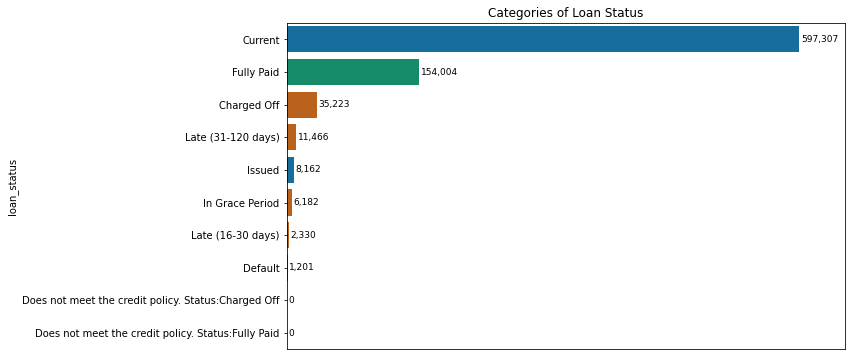

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# df for plotting count
plot_count = loan_df\
    .groupby('loan_status')\
    .aggregate(counts=pd.NamedAgg(column='loan_status', aggfunc='count'))\
    .reset_index()\
    .sort_values('counts', ascending=False)
# plot
red = sns.color_palette('colorblind')[3]
blue = sns.color_palette('colorblind')[0]
green = sns.color_palette('colorblind')[2]
colors = [
    blue, green, red, red, blue, 
    red, red, green, red, red 
    ]
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(
    data=plot_count, x='counts', y='loan_status', order=plot_count.loan_status,
    palette=colors, ax=ax
    )
for y_, x_ in enumerate(plot_count.counts.values):
    ax.text(
        x=(x_ + 2000), y=y_, s=f'{x_:,.0f}', size=9, verticalalignment='center'
    )
ax.set_title('Categories of Loan Status')
ax.set_xlim(0, 650000)
ax.get_xaxis().set_visible(False)
plt.show()

Most of the loan listed in our dataset is on-going loan (`loan_status` = `Current`). However, we can identify some loan that faces some difficulties in paying-off debt on the due date: `Late` and `In Grace Period`. 

To make an easier representation of `loan_status`, we will create a new feature to label the loan as `Good Loan` and `Bad Loan`.

- `Bad Loan` consists of: `Charged Off`, `Default`, `In Grace Period`, and `Late`.
- `Good Loan` consists of: `Fully Paid`.
- `Current` loan possibly may be a `Good Loan`, since up to the data recorded the loan seems to not having paying difficulties.
 
Ideally we can't justify the `Curent Loan` to be either `Good Loan` or `Bad Loan` since it is highly subjective and maybe introducing biases to our dataset. 

However, there may be a pattern of `Current Loan` to be defaulted. For example, we can analyze tendencies of defaulted loan by its `Portion of Loan Amount that has been paid`. We can extract this from `total_rec_prncp` as a portion of `loan_amnt` (recall that `total_rec_prncp` is *principal received to date*). 

Let's see the distribution of portion of loan paid of `Late`, `Default` and `Charged Off` status:

Text(0.5, 1.0, 'Principal of Loan Paid, Bad Loan')

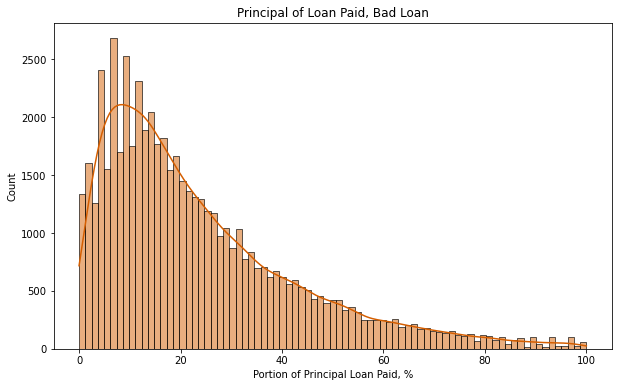

In [48]:
bad_loan = [
    'Charged Off', 'Late (31-120 days)', 'In Grace Period', 
    'Late (16-30 days)', 'Default', 
    'Does not meet the credit policy. Status:Charged Off'
    ]
plot_bad_loan = loan_df[loan_df.loan_status.isin(bad_loan)].assign(
    portion_paid=lambda x: x.total_rec_prncp / x.loan_amnt * 100
    )
plot_bad_loan = plot_bad_loan[['portion_paid']]
# plot
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(data=plot_bad_loan, x='portion_paid', ax=ax, kde=True, color=red)
ax.set_xlabel('Portion of Principal Loan Paid, %')
ax.set_title('Principal of Loan Paid, Bad Loan')


From above plot, the distribution of `Bad Loan` is proportionally lower for higher `Portion of Loan Paid`. This indicate that, by data, *the chance is smaller for loan to be defaulted after large portion of principal has been paid*.

Since the `Good Loan` has more occasion than `Bad Loan`, we can, if necessary, consider `Current Loan` as a `Good Loan` only if the loan is close to be fully paid, specifically when the `total_rec_prncp` $\geq$ `%` portion of `loan_amnt`. But adding more observations to `Good Loan` lead to more imbalanced data towards the `Good Loan`.

On the other hand, we are more interested to oversample our `Bad Loan` to tighten the gap. However, considering `Current Loan` as a `Bad Loan`, let's say for portion of paid loan under `20%`, is very subjective since the `Bad Loan` isn't the majority here.

Let's create a new feature called `loan_category` to classify `Good Loan` and `Bad Loan`. Then, we will look at the proportion of each label.

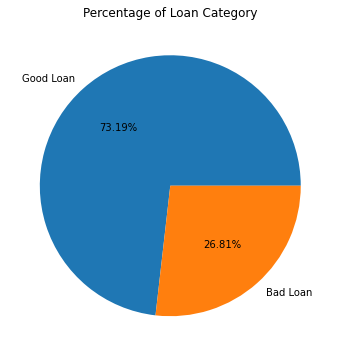

In [49]:
mapping_loan_cat = {
    'Charged Off': 'Bad Loan', 
    'Late (31-120 days)': 'Bad Loan', 
    'In Grace Period': 'Bad Loan', 
    'Late (16-30 days)': 'Bad Loan', 
    'Default': 'Bad Loan', 
    'Does not meet the credit policy. Status:Charged Off': 'Bad Loan',
    'Fully Paid': 'Good Loan', 
    'Does not meet the credit policy. Status:Fully Paid': 'Good Loan'
    }

# loan_cat_vect = np.vectorize(loan_cat)
loan_df = loan_df.assign(
    loan_category = loan_df.loan_status.map(mapping_loan_cat)
    )

# plot
fig, ax = plt.subplots(figsize=(12, 6))
loan_df\
    .loc[loan_df.loan_category.isin(['Good Loan', 'Bad Loan']), 'loan_category']\
    .value_counts()\
    .plot.pie(autopct="%.2f%%", ax=ax)
ax.set_ylabel('')
ax.set_title('Percentage of Loan Category')
plt.show()

Imbalanced sample between `Good Loan` and `Bad Loan` probably would lead to model with low recall in predicting potentially `Bad Loan` (false negative occurs more frequent). For credit business, it is more preferable to avoid defaulted loan rather than taking a risk for maximizing loan numbers then hoping succesfull loan will outnumber (in profit) defaulted loan. Action should be taken.

From now on, we will use `loan_df` subset of `Good Loan` and `Bad Loan`.

In [50]:
loan_df_subset = loan_df[loan_df.loan_category.isin(['Good Loan', 'Bad Loan'])]

#### **Loan Grade by Loan Category**

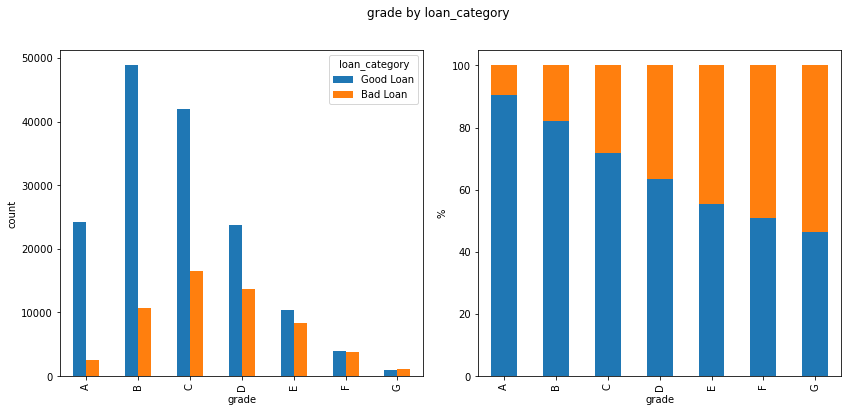

In [51]:
%matplotlib inline
def plot_categorical_count(category, flip=False):
    left = loan_df_subset\
        .value_counts([category, 'loan_category'])\
        .reset_index()\
        .rename(columns={0: 'counts'})
    right = loan_df_subset\
        .value_counts(category)\
        .reset_index()\
        .rename(columns={0: 'total_count'})
    emp_length_count = pd.merge(
        left, right, on=category, how='left'
        )
    emp_length_count = emp_length_count.assign(
        portion=lambda x: x.counts / x.total_count * 100
        )
    # plot
    fig, ax = plt.subplots(1, 2, figsize=(14, 6))
    if flip:
        plot_count = emp_length_count\
            .pivot(index=category, columns='loan_category', values='counts')\
            .plot.barh
        plot_portion = emp_length_count\
            .pivot(index=category, columns='loan_category', values='portion')\
            .plot.barh
        ax[0].set_xlabel('count')
        ax[1].set_xlabel('%')
    else:
        plot_count = emp_length_count\
            .pivot(index=category, columns='loan_category', values='counts')\
            .plot.bar
        plot_portion = emp_length_count\
            .pivot(index=category, columns='loan_category', values='portion')\
            .plot.bar
        ax[0].set_ylabel('count')
        ax[1].set_ylabel('%')
    plot_count(y=['Good Loan', 'Bad Loan'], ax=ax[0])
    plot_portion(y=['Good Loan', 'Bad Loan'], ax=ax[1], stacked=True)
    ax[1].get_legend().set_visible(False)
    fig.suptitle(f'{category} by loan_category')
    fig.subplots_adjust(wspace=0.15, hspace=0.1)

plot_categorical_count('grade')

Using above code, we generate two chart: left-hand plot is to show comparable `counts` of loan between each `grade` classes, while right-hand plot is to show portion of Good-Bad loan between `grade` classes, scaled to `100%` (normalized). 

From the above plot, we can see that, for lower grade, the chance that the loan will be a `Good Loan` is become more similar than its likeliness to be a `Bad Loan`. For `F` and `G` Grade, the almost 50-50 percent portion is just like a flipping coin to decide if the loan will be good or bad!

So what is the loan `Grade` actually for the LendingClub Loan Data? Turns out that it is the *Ranking* according to *LendingClub Scoring Model,* which analyzes the performance of borrower members taking into account FICO Score, credit attributes, and other application data (See LendingClub website for more detailed information). 

Looking at the occurence of `Bad Loan` on the plot above, is it worth to consider investing on the lower grade loan? Higher risk, higher profit! Lower-graded loan has a higher interest rate:

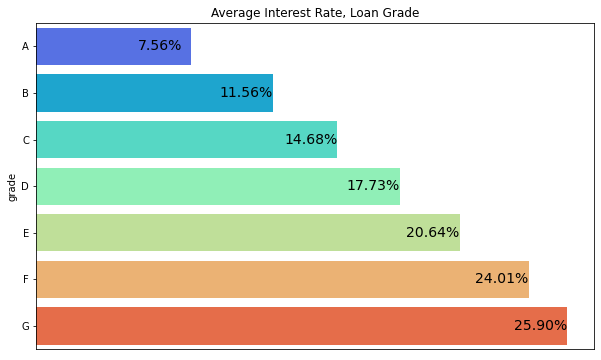

In [52]:
# df for plotting count
avg_int = loan_df_subset\
    .groupby('grade')\
    .aggregate(avg_int_rate=pd.NamedAgg(column='int_rate', aggfunc='mean'))\
    .reset_index()
# plot
colors = sns.color_palette('rainbow', len(avg_int))
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(
    data=avg_int, x='avg_int_rate', y='grade',
    palette=colors, ax=ax
    )
for y_, x_ in enumerate(avg_int.avg_int_rate.values):
    ax.text(
        x=(x_ - 2.6), y=y_, s=f'{x_:,.2f}%', size=14, verticalalignment='center'
    )
ax.set_title('Average Interest Rate, Loan Grade')
ax.get_xaxis().set_visible(False)
plt.show()

So how come *higher risk, higher profit* relate to our investment to lending? The most simple way to explain it by looking at its loan `Value` of an investment unit:

$$Value=Probability\times\;Return-1$$

For example, the investment of *Grade-G* loan (`1.25x` return) may be profittable if we can estimate the probability of that particular loan to be a `Good Loan` for above `80%`.

Furthermore, how much we can expect loan payment if somehow the loan would be defaulted? Below graph shows the `Bad Loan` average portion of loan paid according to its loan `grade`.

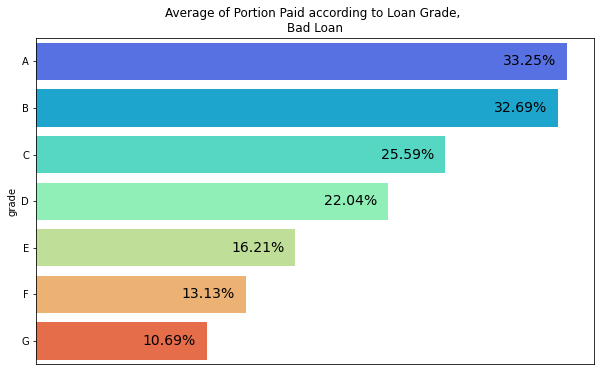

In [53]:
loan_df_subset = loan_df_subset\
    .assign(
        portion_paid=lambda x: x.total_rec_prncp / x.loan_amnt * 100
        )
avg_portion = loan_df_subset\
    [loan_df_subset.loan_category == 'Bad Loan']\
    .groupby('grade')\
    .aggregate(avg_portion_paid=pd.NamedAgg(column='portion_paid', aggfunc='mean'))\
    .reset_index()

# plot
colors = sns.color_palette('rainbow', len(avg_portion))
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(
    data=avg_portion, x='avg_portion_paid', y='grade',
    palette=colors, ax=ax
    )
for y_, x_ in enumerate(avg_portion.avg_portion_paid.values):
    ax.text(
        x=(x_ - 4), y=y_, s=f'{x_:,.2f}%', size=14, verticalalignment='center'
        )
ax.set_title('Average of Portion Paid according to Loan Grade, \nBad Loan')
ax.get_xaxis().set_visible(False)
plt.show()

As we can see, the loan `grade` explains the loan risk very well. Based on evidence above, we expect lower fund recovery for defaulted lower grade loan. 

#### **Employment Length by Loan Status**

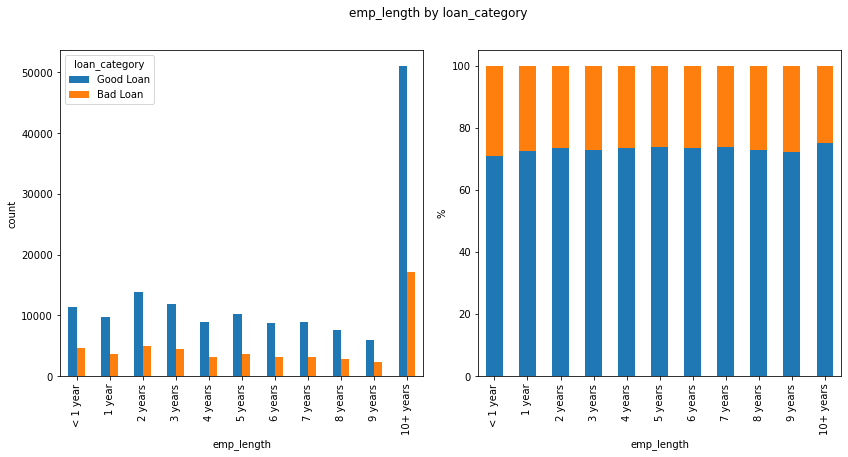

In [54]:
plot_categorical_count('emp_length')

Majority of the loaner has a senior employment status with 10 years experience or more. There is no distinguishable pattern whether lower employment length or higher employment length provide (significant) evidence of more likely to be defaulted on loan.

#### **Home Ownership by Loan Status**

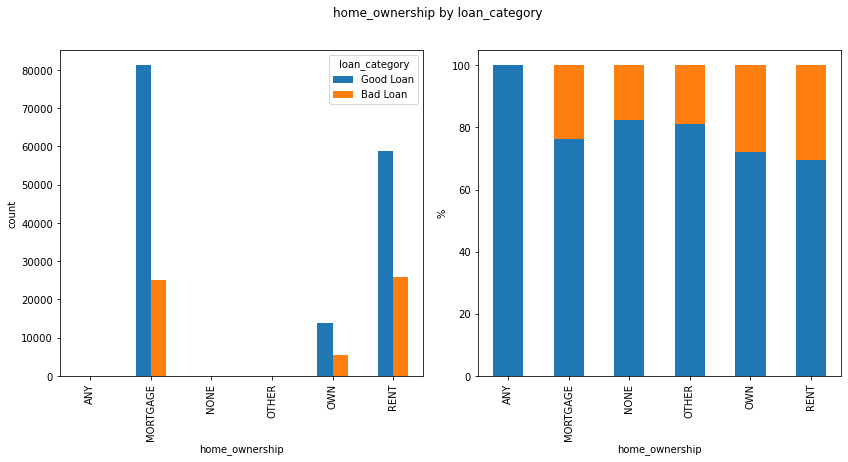

In [55]:
plot_categorical_count('home_ownership')

Again, there is no distinguishable pattern whether particular home ownership is (significantly) more likely to be defaulted on loan. However, we can see that `RENT` ownership (by proportion of `Bad Loan` within classes) has a slighter evidence of more likely to be defaulted than `MORTGAGE`.

#### **Loan Status by Purpose**

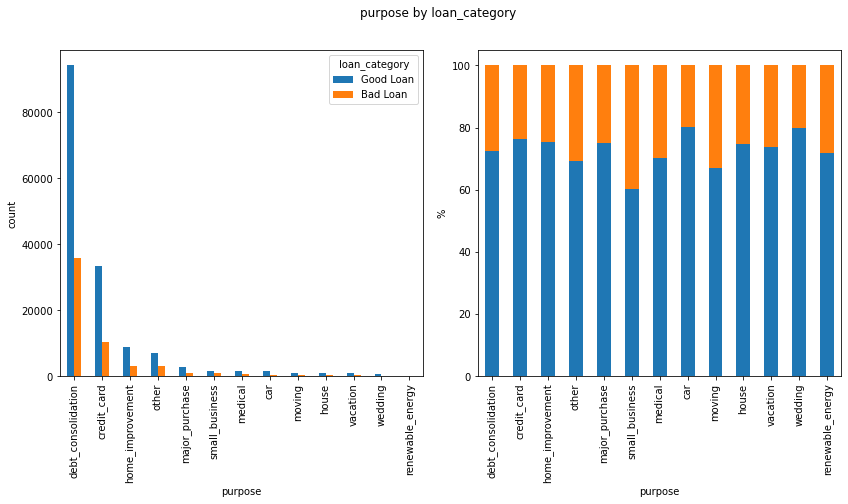

In [56]:
plot_categorical_count('purpose')

Based on above plot, there is evidence that loan for `small_business` has a slightly higher defaulted portion among other classes.

#### **Loan Status by Term**

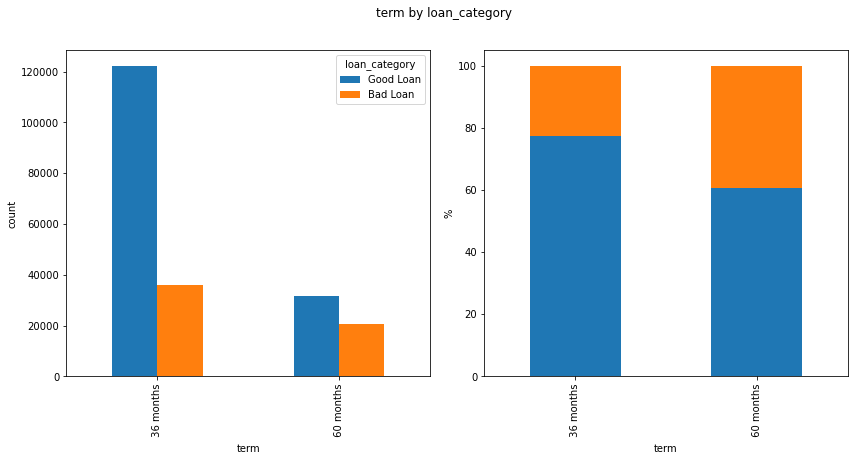

In [57]:
plot_categorical_count('term')

Considering the frequency of submitted loan, 36-months term dominates the longer 60-months term. Moreover, there is slightly higher evidence of defaulted loan for 60-months term.

### 2.2. Numerical Data

In [58]:
loan_df_subset.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,portion_paid
count,210406.00,210406.00,210406.00,210406.00,210406.00,210406.00,210406.00,210406.00,210406.00,210406.00,210406.00,210406.00,210406.00,210406.00,210406.00,210406.00,210406.00,210406.00,210406.00,210406.00,210406.00,210406.00,210406.00,210406.00,210406.00,210406.00,210406.00,210406.00,210406.00,210406.00,210406.00,0.00,0.00,210406.00,210406.00,210406.00,210406.00,210406.00,210406.00,210406.00,210406.00,210406.00,210406.00,210406.00,210406.00,210406.00,210406.00,210406.00,210406.00,210406.00,210406.00
mean,17644379.16,19422532.73,14336.58,14336.53,14329.64,14.41,442.15,73727.65,17.55,0.31,0.85,67.79,95.43,11.39,0.18,15673.67,55.46,25.87,1180.41,1179.98,13214.67,13208.02,11137.08,1921.02,0.84,155.73,16.57,6886.24,0.01,84.75,1.00,NaN,NaN,0.00,205.38,136847.80,0.00,0.00,0.00,98.92,38.95,0.07,0.00,0.00,5.98,0.06,29431.11,0.00,0.00,0.00,79.46
std,16276714.56,17185356.83,8260.50,8260.42,8256.93,4.45,247.72,61681.61,7.98,0.83,1.07,35.66,13.75,5.01,0.50,19915.88,23.83,11.82,4309.23,4307.63,9563.25,9558.63,8601.51,2016.14,6.02,724.20,102.95,7603.61,0.11,26.64,0.00,NaN,NaN,0.07,20022.01,151386.21,0.06,0.05,0.09,2.67,1672.06,2.36,0.07,0.14,246.75,2.08,29448.80,0.07,0.14,0.15,35.23
min,57167.00,137225.00,1000.00,1000.00,950.00,5.32,27.85,3000.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-4.00,0.00
25%,5414798.50,6418125.50,8000.00,8000.00,8000.00,11.14,264.94,45000.00,11.56,0.00,0.00,32.00,99.00,8.00,0.00,6221.00,38.20,17.00,0.00,0.00,5873.48,5870.61,4186.32,617.55,0.00,0.00,0.00,536.01,0.00,80.00,1.00,NaN,NaN,0.00,0.00,28371.25,0.00,0.00,0.00,99.00,0.00,0.00,0.00,0.00,0.00,0.00,13200.00,0.00,0.00,0.00,57.32
50%,10844643.00,12637728.50,12000.00,12000.00,12000.00,14.09,388.00,64000.00,17.13,0.00,1.00,99.00,99.00,11.00,0.00,11272.00,56.60,24.00,0.00,0.00,11081.14,11076.12,9600.00,1309.17,0.00,0.00,0.00,4483.09,0.00,99.00,1.00,NaN,NaN,0.00,0.00,78664.00,0.00,0.00,0.00,99.00,0.00,0.00,0.00,0.00,0.00,0.00,22000.00,0.00,0.00,0.00,100.00
75%,27651024.25,30143527.75,20000.00,20000.00,19950.00,17.56,577.01,89000.00,23.24,0.00,1.00,99.00,99.00,14.00,0.00,19537.00,74.00,33.00,0.00,0.00,18314.52,18305.10,16000.00,2470.88,0.00,0.00,0.00,10772.06,0.00,99.00,1.00,NaN,NaN,0.00,0.00,205955.75,0.00,0.00,0.00,99.00,0.00,0.00,0.00,0.00,0.00,0.00,36500.00,0.00,0.00,0.00,100.00
max,68604659.00,73507418.00,35000.00,35000.00,35000.00,28.99,1424.57,8900060.00,39.99,29.00,7.00,152.00,121.00,76.00,20.00,1746716.00,892.30,150.00,35000.00,35000.00,56087.91,56047.85,35000.00,21087.91,358.68,33520.27,5694.09,36475.59,6.00,159.00,1.00,NaN,NaN,5.00,9152545.00,8000078.00,6.00,6.00,14.00,193.00,249212.00,129.20,8.00,21.00,30567.00,102.80,2013133.00,9.00,21.00,19.00,100.00


#### **Correlation Coefficient**

We are going to use correlation coefficient that works with categorical problem: `Point Biserial` and `Phi-k` correlation coefficient.

In [59]:
import phik
from phik import resources, report
from scipy import stats

def categorical_corr_table(dataframe, sample_size=None):
    if sample_size:
        X = dataframe.sample(sample_size)
    else:
        X = dataframe.copy()
    # phi-k correlation matrix
    X_phik_corr = X.phik_matrix()['loan_category']
    # point biserial correlation
    pbis_corr, pbis_p = [], []
    X.loan_category = X.loan_category.map({'Good Loan': 0, 'Bad Loan': 1})
    for var_ in X.columns:
        try:
            pbis_corr.append(
                stats.pointbiserialr(X[var_], 
                X['loan_category'])[0]
                )
            pbis_p.append(
                stats.pointbiserialr(X[var_], 
                X['loan_category'])[1]
                )
        except (ValueError, AttributeError): # Error caused by NaN records
            pbis_corr.append(
                stats.pointbiserialr(X.loc[~X[var_].isna(), var_], 
                X.loc[~X[var_].isna(), 'loan_category'])[0]
                )
            pbis_p.append(
                stats.pointbiserialr(X.loc[~X[var_].isna(), var_], 
                X.loc[~X[var_].isna(), 'loan_category'])[1]
                )
    X_pbis_corr = pd.Series(pbis_corr, index=X.columns)
    X_pbis_p = pd.Series(pbis_p, index=X.columns)
    #combining subset
    X_corr = pd.concat([X_phik_corr,
                                    X_pbis_corr,
                                    np.abs(X_pbis_corr),
                                    X_pbis_p],
                                    axis=1)
    X_corr.columns = [
        'phi-k corr.', 'point biserial corr.', 'point biserial corr. (mag.)', 'point biserial p-value'
        ]
    return X_corr

interval columns not set, guessing: ['annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'pub_rec', 'max_bal_bc']
interval columns not set, guessing: ['loan_amnt', 'int_rate', 'installment']


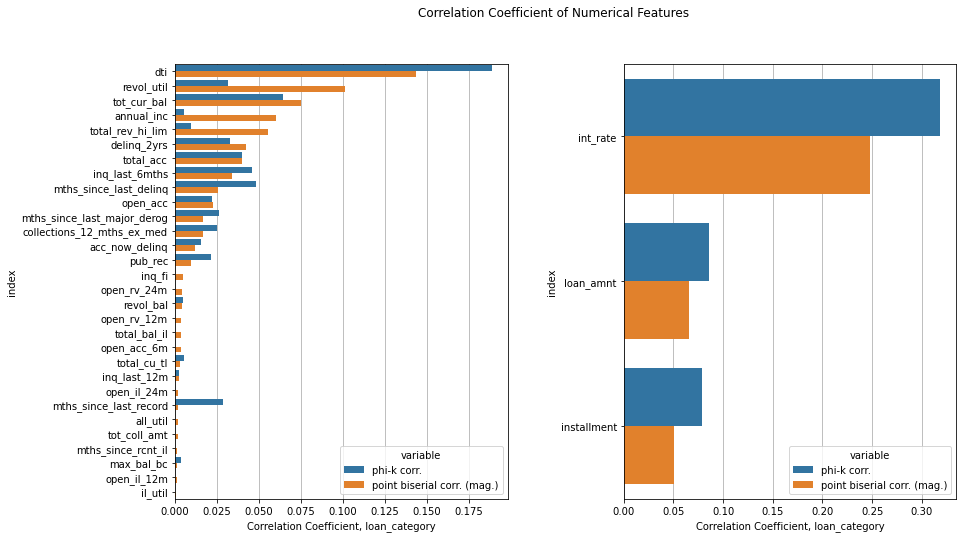

In [60]:
applicant_ftrs_nums = (
    ['loan_category']
    + loan_df_subset[applicant_features].select_dtypes(exclude=['object', 'category', 'datetime64']).columns.tolist()
    ) 
loan_ftrs_nums = (
    ['loan_category']
    + loan_df_subset[loan_features].select_dtypes(exclude=['object', 'category', 'datetime64']).columns.tolist()
    )
dfs_to_plot = [
    loan_df_subset[applicant_ftrs_nums].drop(columns=['annual_inc_joint', 'dti_joint', 'member_id', 'policy_code']), 
    loan_df_subset[loan_ftrs_nums].drop(columns=['id', 'policy_code'])] 
# plot point biserial correlation
fig, ax = plt.subplots(1, 2, figsize=(14, 8))
for idx, df_ in enumerate(dfs_to_plot):
    corr_df = categorical_corr_table(df_, sample_size=100000)
    plot_corr_df = corr_df\
        .drop('loan_category')\
        .reset_index()\
        .melt(id_vars=['index'], 
              value_vars=corr_df.columns[[0, 2]])
    plot_order = corr_df.drop('loan_category').sort_values('point biserial corr. (mag.)', ascending=False).index
    sns.barplot(y='index', x='value', hue='variable', data = plot_corr_df, order=plot_order, ax=ax[idx])
    ax[idx].grid(visible=True, axis='x')
    ax[idx].set_axisbelow(True)
    ax[idx].set_xlabel('Correlation Coefficient, loan_category')
fig.suptitle('Correlation Coefficient of Numerical Features')
fig.subplots_adjust(wspace=0.35, hspace=0.05)

High difference in correlation coefficient magnitude occurs for features `revol_util`, `tot_cur_bal`, `ann_inc`, and `total_rev_hi_lim`.

Let's check the distribution of each parameters.

interval columns not set, guessing: ['annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'pub_rec', 'max_bal_bc', 'loan_amnt', 'int_rate', 'installment']


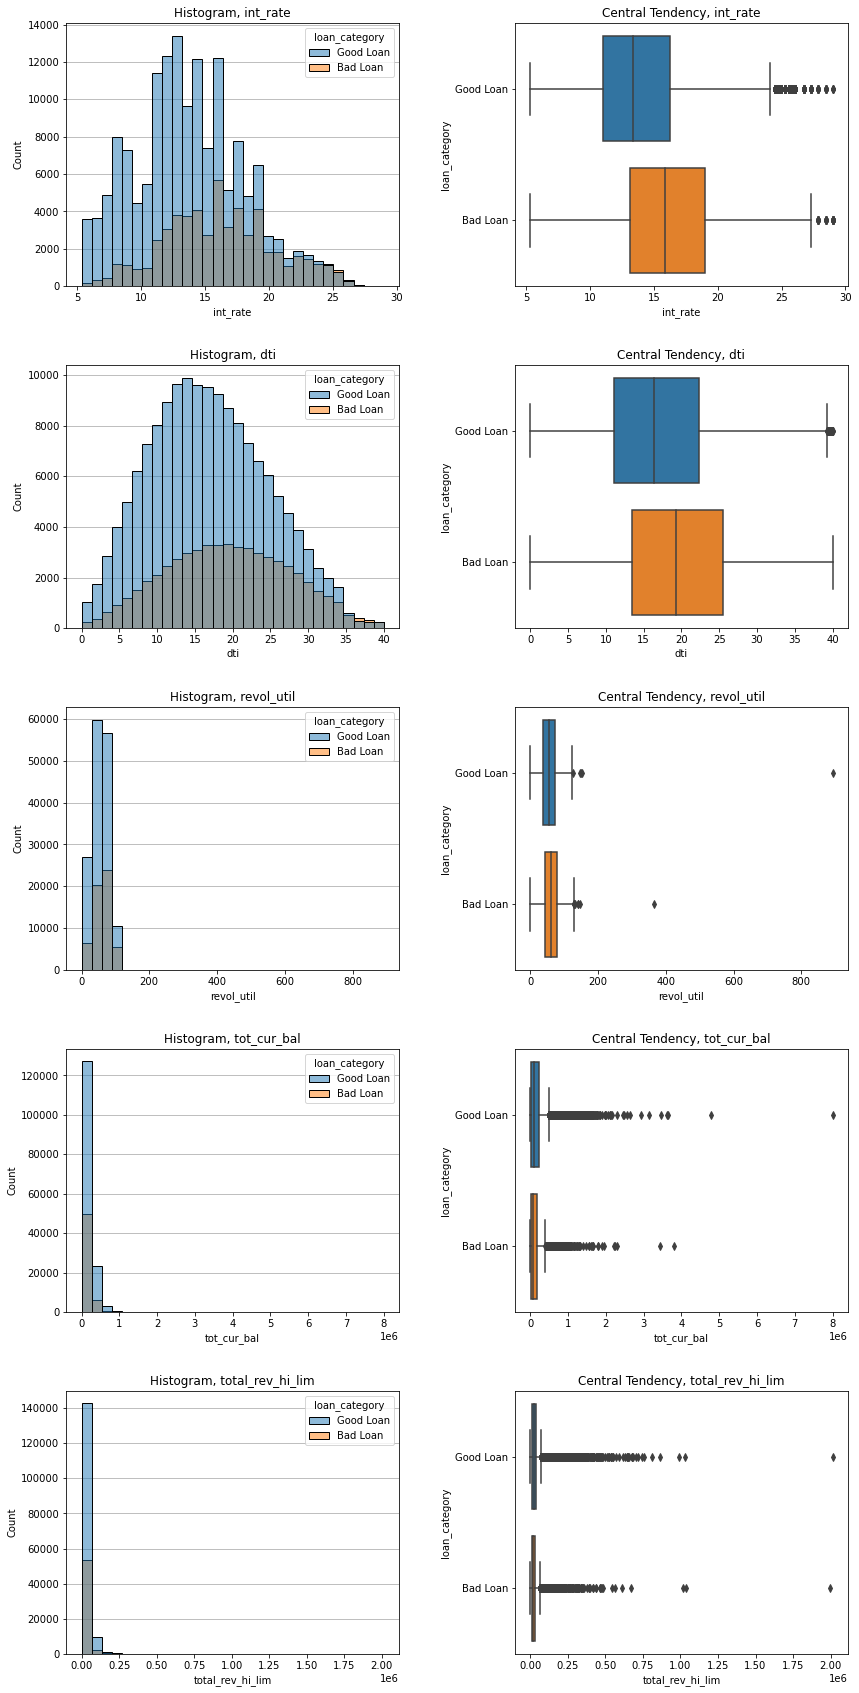

In [61]:
ftrs_nums = (
    ['loan_category']
    + loan_df_subset[applicant_features].select_dtypes(exclude=['object', 'category', 'datetime64']).columns.tolist()
    + loan_df_subset[loan_features].select_dtypes(exclude=['object', 'category', 'datetime64']).columns.tolist()
    )
plot_df = loan_df_subset[ftrs_nums]\
    .drop(columns=['dti_joint', 'annual_inc_joint', 'member_id', 'id', 'policy_code'])
corr_df = categorical_corr_table(plot_df, sample_size=100000)
x = corr_df.drop('loan_category').sort_values('point biserial corr. (mag.)', ascending=False).index[:5]
fig, ax= plt.subplots(len(x), 2, figsize=(14, 6 * len(x)))
for x, axes in zip(x, ax):
    sns.histplot(data=plot_df, x=x, bins=30, hue='loan_category', ax=axes[0], alpha=0.5)
    sns.boxplot(data=plot_df, x=x, y='loan_category', ax=axes[1])
    axes[0].grid(visible=True, axis='y')
    axes[0].set_axisbelow(True)
    axes[0].set_title(f'Histogram, {x}')
    axes[1].set_title(f'Central Tendency, {x}')
fig.subplots_adjust(wspace=0.35, hspace=0.3)

From above plots, points observed:

- Variables from above to below is sorted by the highest to lowest correlation coefficient.
- Interest rate (`int_rate`) is the most significant feature among others. 
- Each variables has a highly different value scales, needs to be standardized.
- From above to below, the distribution between `Good Loan` and `Bad Loan` class is becoming less different. It may inform that the more different the distribution between classes, the more that variable may be useful and importance to the model as classification features. 
- We should focus on several features that has skewed (right-skewed, specifically) distributions and have a high number of outliers.
- it is clear that only `dti` has a more normal-distribution than others, identified by the histogram and well-balanced boxplot (centered median and balanced whisker for class `Bad Loan`, however class `Good Loan` is less Gaussian). Other than that, especially `revol_util`, `tot_cur_bal`, `ann_inc`, `total_rev_hi_lim` and other variables that has correlation coefficient close to zero, has a lot of outliers.
- For features that majority records zeroes (for example `pub_rec`, `acc_now_delinq`, etc.), the outliers is (probably) not exactly an anomaly. Hence if we simply discard it we may lose important information that may reduce our data representativeness. In the next process we will conduct more detailed outlier identification for each of the features.

Next, we will inspect numerical features that are highly correlated with other features. Heatmap below shows Spearman's correlation coefficient, where the order of the columns and rows are determined by a clustering algorithm. I don't want to focus on the clustering algorithm here, but the motivation is to make the correlation plot more tidy. I will utilize a high-level seaborn clustermap to do this.

In [62]:
# loan_df_subset = loan_df\
#     .loc[loan_df.loan_category.isin(['Good Loan', 'Bad Loan']), plot_order]
# loan_df_subset_corr = loan_df_subset[plot_order].corr(method='spearman')

# sns.clustermap(loan_df_subset_corr, vmin=-1, vmax=1, center=0, cmap='vlag', annot=True, fmt='.2f', annot_kws={'size': 7})

There is a pair of features that show high correlation: `loan_amnt` and `installment`. According to the explanation, it is clear because installment is a monthly payment based on loan amount (+ *interest*) divided by number of payment (i.e. loan `term`). So we can just use `installment` to cover both `loan_amnt` and `term`. Note that we can utilize this high correlation to identify outliers, which will explore more later at the next chapter. 

Closing note for our numerical features: less gaussian distribution, a lot of outliers, and a less linearly related variables make our feature analysis by utilizing correlation coefficient is not properly suitable for our dataset. Indeed we still can  observe generally which variables may be potential for our model features and which one may be discarded to avoid overfitting.

Later, more robust methods for feature selection will be conducted. Feature transformation to make the distribution more Gaussian will also be conducted.

#### **Multicollinearity**

Collinearity between predictor variables can mask the importance of a variable that is collinear with such. In multiple regression setting with high degree of predictor variables, it is also possible for collinearity to exist between three or more variables even if no pair of variables has a particularly high correlation, which is called *multicollinearity*.

The `VIF` (variance inflation factor) is known to be a better way to assess mulicollinearity.

In [66]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

check_vif = plot_df.drop(columns=['loan_category'])
pd.DataFrame({
    'vif': 
        [variance_inflation_factor(check_vif, i) for i in range(check_vif.shape[1])]
    }, index=check_vif.columns).sort_values(by='vif', ascending=False).T

,mths_since_rcnt_il,mths_since_last_record,loan_amnt,installment,mths_since_last_major_derog,int_rate,open_acc,il_util,total_acc,all_util,total_rev_hi_lim,revol_util,revol_bal,mths_since_last_delinq,dti,open_rv_12m,open_rv_24m,open_il_24m,open_il_12m,open_acc_6m,annual_inc,inq_last_12m,inq_fi,total_bal_il,tot_cur_bal,max_bal_bc,pub_rec,inq_last_6mths,delinq_2yrs,total_cu_tl,acc_now_delinq,collections_12_mths_ex_med,tot_coll_amt
vif,132.65,87.11,50.46,50.17,16.89,15.86,12.93,12.27,12.20,12.03,11.88,11.74,8.94,8.92,7.45,6.83,6.36,5.86,5.35,4.72,3.35,3.05,2.98,2.93,2.78,2.57,1.98,1.88,1.71,1.42,1.03,1.02,1.00


Multicollinearity only impacts multiple regression model and should be considered carefully.

## 3. Summary

We already got some understanding for a credit business and the motivation behind developing machine learning classifier, specifically for *Lending Club Peer-to-peer Loan*, although the provided dataset may set constraint for our model here and there.

Then, we discovered that our dataset has several variables that uninsightful for machine learning modeling. Also, the characteristic of our data is not ideal enough to implement statistical method directly hence need some cleaning and transformations. 

Lastly, we can conclude below information for our next activity: **Model Development**.

1. Subsetting the data
    - Discard the features related to post-origanted loan to avoid leaking the information to our model that may infer the class.
    - Choose on of the features that highly correlated with each other (between `loan_amnt` and `installment`)
    - Discard the features with zero records
    - Discard the high cardinality columns (`emp_title`, `url`, `desc`, `title`, `zip_code`, `addr_state`)
    - Subset the `loan_category` row to include only `Good Loan` and `Bad Loan` class

2. Cleaning the data
    - Some discrete numeric features have inconsistent data types that need to be corrected
    - The dataset has a feature of ordinal category: `employment length`
    - Some features have missing data to be handled
    - Some features have a lot of outliers to be handled

3. Dataset Preparation and Feature Engineering
    - Handle the imbalanced sample
    - Feature transformation for skewed data
    - Encoding categorical features
    - Feature selection